In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.layers import Input ,Embedding ,Dense ,Concatenate ,LSTM, Bidirectional , TimeDistributed 
from tensorflow.keras.models import Model , Sequential

import warnings
pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore')


In [13]:
from nltk.corpus import stopwords

In [14]:
data = pd.read_csv("Reviews.csv",nrows = 5000)

In [15]:
data.drop_duplicates(subset=['Text'],inplace =True)
data.dropna(axis=0,inplace = True)

In [16]:

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [17]:
stop_words =set(stopwords.words('english'))
def Textcleaner(text):
    string = text.lower()
    string = BeautifulSoup(string,"lxml").text
    string = re.sub(r'\([^)]*\)', '', string)
    string = re.sub('"','', string)
    string = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in string.split(" ")])    
    string = re.sub(r"'s\b","",string)
    string = re.sub("[^a-zA-Z]", " ", string)
    tokens = [w for w in string.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()
cleaned_text =[]
for i in data['Text']:
    cleaned_text.append(Textcleaner(i))

In [18]:
def Summarycleaner(text):
    string = re.sub('"','', text)
    string = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in string.split(" ")])    
    string = re.sub(r"'s\b","",string)
    string = re.sub("[^a-zA-Z]", " ", string)
    string = string.lower()
    tokens = string.split()
    string=''
    for i in tokens:
        if len(i)>1:                                 
            string=string+i+' '  
    return string

cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(Summarycleaner(t))

data['cleaned_text'] = cleaned_text
data['cleaned_summary'] = cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace = True)

In [19]:
for i in range(5):
    print("Review:",data['cleaned_text'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("\n")    

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: good quality dog food 


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: not as advertised 


Review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Summary: delight says it all 


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: cough medicine 


Review: great taffy great price wide assortment yummy taffy delivery quick taffy lover deal
Summary: great taffy 




<function matplotlib.pyplot.show(*args, **kw)>

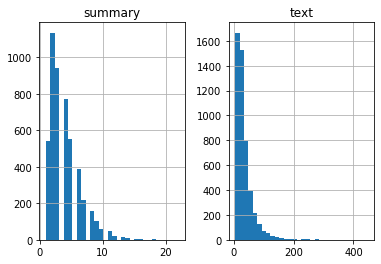

In [20]:
import matplotlib.pyplot as plt

text_count = []
summary_count = []

for i in data['cleaned_text']:
    text_count.append(len(i.split()))
    
for i in data['cleaned_summary']:
    summary_count.append(len(i.split()))
    
length = pd.DataFrame({'text': text_count,'summary':summary_count})
length.hist(bins=30)
plt.show

In [21]:
max_text_len = 50
max_summary_len = 10

In [22]:
cleaned_text =np.array(data['cleaned_text'])
cleaned_summary=np.array(data['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [23]:
df['summary'] = df['summary'].apply(lambda x :'sos ' + x + ' eos')

In [24]:
df['summary']

0                                sos good quality dog food  eos
1                                    sos not as advertised  eos
2                                  sos delight says it all  eos
3                                       sos cough medicine  eos
4                                          sos great taffy  eos
                                 ...                           
3997                              sos best for oyster soup  eos
3998                                           sos amazing  eos
3999                sos the cavemen must have been wealthy  eos
4000                           sos okay in pinch not great  eos
4001    sos they are good except for the rainforest flavor  eos
Name: summary, Length: 4002, dtype: object

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train , x_val , y_train , y_val = train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

In [27]:
x_train = list(x_train)
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(x_train)

In [28]:
thresh = 4

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt  = tot_cnt+1
    tot_freq = tot_freq+value
    if(value<thresh):
        cnt  = cnt+1
        freq = freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 68.21009810959559
Total Coverage of rare words: 9.499376279803235


In [29]:
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(x_train)

In [30]:
x_train =   x_tokenizer.texts_to_sequences(x_train) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

x_train =   pad_sequences(x_train,maxlen=max_text_len, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_text_len, padding='post')

x_voc_size   =  x_tokenizer.num_words +1                          #NOT SURE

In [31]:
y_tokenizer = Tokenizer()
y_train = list(y_train)
y_tokenizer.fit_on_texts(y_train)

In [32]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 85.2991452991453
Total Coverage of rare words: 16.730440036250126


In [33]:
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
y_tokenizer.fit_on_texts(list(y_train))

y_train =   y_tokenizer.texts_to_sequences(y_train) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

y_train =   pad_sequences(y_train, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_summary_len, padding='post')

y_voc_size  =  y_tokenizer.num_words +1                          #NOT SURE

In [34]:
y_tokenizer.word_counts['sos'],len(y_train)

(3601, 3601)

Removing rows contaning only START and END tokens

In [35]:
ind = []
for i in range(len(y_train)):
    cnt=0
    for j in y_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_train,ind, axis=0)
x_tr=np.delete(x_train,ind, axis=0)

In [36]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [37]:
from tensorflow.keras import backend as K
K.clear_session()

latent_dim = 300
embedding_dim = 100

encoder_inputs = Input(shape=(max_text_len,))

enc_emb =  Embedding(x_voc_size, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)
encoder_states = [state_h,state_c]


decoder_inputs = Input(shape=(None,))

dec_emb = Embedding(y_voc_size, embedding_dim,trainable=True)(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
import attention as at
attn_layer = at.AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_dense =  TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 100)      265800      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 300), (N 481200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
lstm_1 (LS

In [39]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [41]:
history=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=25,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Train on 3601 samples, validate on 369 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
3601/3601 [==============================] - 159s 44ms/sample - loss: 2.7888 - acc: 0.5875 - val_loss: 1.9337 - val_acc: 0.6218
Epoch 2/25
3601/3601 [==============================] - 164s 46ms/sample - loss: 1.9195 - acc: 0.6522 - val_loss: 1.7880 - val_acc: 0.6841
Epoch 3/25
3601/3601 [==============================] - 174s 48ms/sample - loss: 1.7313 - acc: 0.7040 - val_loss: 1.6635 - val_acc: 0.7212
Epoch 4/25
3601/3601 [==============================] - 182s 51ms/sample - loss: 1.6545 - acc: 0.7167 - val_loss: 1.6370 - val_acc: 0.7221
Epoch 5/25
3601/3601 [==============================] - 189s 52ms/sample - loss: 1.6324 - acc: 0.7167 - val_loss: 1.6203 - val_acc: 0.7221
Epoch 6/25
3601/3601 [==============================] - 190s 53ms/sample - loss: 1.6086 - acc: 0.7163 - val_loss: 1.6062 - val_acc: 0.7224
Epoch 7/25
3601/3601 [==============================] - 199s 55ms/sampl

In [16]:
from tensorflow.keras.models import load_model
mod = load_model("new_model(1).h5")

OSError: Unable to open file (unable to open file: name = 'new_model(1).h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [14]:
with open('model_config.json') as json_file:
    json_config = json_file.read()
new_model = tf.keras.models.model_from_json(json_config)

ValueError: ('Unrecognized keyword arguments:', dict_keys(['ragged']))

In [18]:
import scipy.io
f = scipy.io.loadmat('new_model.h5')


ValueError: Unknown mat file type, version 0, 0

In [1]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

NameError: name 'y_tokenizer' is not defined

Inference Model

In [43]:
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

dec_emb2= Embedding(y_voc_size, embedding_dim,trainable=True)(decoder_inputs) 

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

decoder_outputs2 = decoder_dense(decoder_inf_concat) 

decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],[decoder_outputs2] + [state_h2, state_c2])




In [44]:
def decode_seq(input_seq):
    e_out ,e_h ,e_c = encoder_model.predict(input_seq)
    
    target_seq = np.zeros((1,1))
    
    target_seq[0,0] = target_word_index['sos']
    
    stop_condition = False
    
    decoded_sentence = ''
    
    while not stop_condition :
        
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!=' eos'):
            decoded_sentence += ' '+sampled_token
            
        if(sampled_token!=' eos' or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True
            
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        
        e_h, e_c = h, c
        
        
    return decoded_sentence


In [45]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sos']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [46]:
for i in range(0,5):
    print("Review:",seq2text(x_train[i]))
    print("Original summary:",seq2summary(y_train[i]))
    print("Predicted summary:",decode_seq(x_train[i].reshape(1,max_text_len)))
    print("\n")

Review: two english terrier bad allergies one picky quickly stopped eating type dog food bought eating newman advanced dog formula active senior dogs months tired skin improved love buy subscription never worry running cheaper way purchase local stores sell small bags expensive way buy 
Original summary: great for sensitive dogs 
Predicted summary:  great


Review: tea drinking honestly say best earl grey ever tasted ordered number times batch consistently excellent even given gift container superb keeping loose tea fresh metal canister lid knob tea stays dry fresh length time takes use favor like earl grey treat tea 
Original summary: favorite tea 
Predicted summary:  best


Review: soup rather meal outside little taste little chicken mostly rice weak chicken stock potato corn bad want light convenient snack chef meals tastier also convenient pull lid comes away easily hormel compleats top first afterwards easy especially hot 
Original summary: not lot of flavor not lot of chicken 
Pr

In [105]:
target_word_index['sos']

KeyError: 'sos'

In [63]:
import h5py

In [64]:
from tensorflow.keras.models import load_model
mod = load_model('my_model.h5')

ValueError: ('Unrecognized keyword arguments:', dict_keys(['ragged']))